In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import peakutils
import math
#from moviepy.editor import *
import cv2
import scipy.stats as stats
#important for text to be detected when importing saved figures into illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure S9"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
statspath = os.path.join(rootpath,"stats")
for x in [figurepath,datapath,metapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure S9B,C

In [4]:
# The summary of analysis for TRAP cell distribution in the MPOA.
# The sections used in antibody staining were used for analysis.
# The cells in the MPN were counted.

all_probe_cells = pd.read_csv(os.path.join(datapath,'FigS9_all_TRAP_cells.csv'),index_col = False)

## Figure S9B

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\1157878188.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = all_probe_cells,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


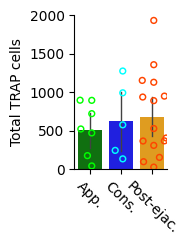

In [5]:
variable = 'Probe_cells'
figure_key = 'S9B'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.))
sns.barplot(data = all_probe_cells,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
errwidth = 1,palette = ['green','blue','orange'],color= 'k')
sns.swarmplot(data = all_probe_cells,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
facecolors='none',palette = ['lime','cyan','orangered'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Cons.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Total TRAP cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pickle
#perform two-way ANOVA
model = ols(f'{variable} ~ C(Stim)', data=all_probe_cells).fit()
#sm.stats.anova_lm(model, typ=2)
table = sm.stats.anova_lm(model, typ=2)

# Extract ANOVA results
anova_df1 = table['df'].values[0]  # Between-subject df
anova_df2 = table['df'].values[1]  # Error df
anova_F = table['F'].values[0]
anova_p = table['PR(>F)'].values[0]
# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':'Total number of TRAP cells',
    'Type of Test': 'One-way ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_probe_cells[variable],all_probe_cells['Stim'])
tukey_summary = tukey_results.summary()

# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure{figure_key}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':'Total number of TRAP cells',
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'meandiff',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

## Figure S9C

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\175216996.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = all_probe_cells,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


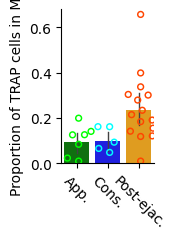

In [7]:
variable = 'Proportion_of_TRAP_cells_in_MPN'
figure_key = 'S9C'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.))
sns.barplot(data = all_probe_cells,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
errwidth = 1,palette = ['green','blue','orange'],color= 'k')
sns.swarmplot(data = all_probe_cells,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
facecolors='none',palette = ['lime','cyan','orangered'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Cons.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Proportion of TRAP cells in MPN')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pickle
#perform two-way ANOVA
model = ols(f'{variable} ~ C(Stim)', data=all_probe_cells).fit()
#sm.stats.anova_lm(model, typ=2)
table = sm.stats.anova_lm(model, typ=2)
print(table)
# Extract ANOVA results
anova_df1 = table['df'].values[0]  # Between-subject df
anova_df2 = table['df'].values[1]  # Error df
anova_F = table['F'].values[0]
anova_p = table['PR(>F)'].values[0]
# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':variable,
    'Type of Test': 'One-way ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_probe_cells[variable],all_probe_cells['Stim'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure{figure_key}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':'Total number of TRAP cells',
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'meandiff',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

            sum_sq    df         F    PR(>F)
C(Stim)   0.131161   2.0  4.333471  0.024731
Residual  0.363202  24.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
  Appetitive     Consummatory   0.0048 0.9975 -0.1751 0.1847  False
  Appetitive Post_ejaculatory   0.1422 0.0471  0.0016 0.2829   True
Consummatory Post_ejaculatory   0.1374 0.0984 -0.0212 0.2961  False
-------------------------------------------------------------------


# Figure S9E-G

In [9]:
# The summary of analysis for c-Fos antibody staining in the MPOA.

HCR_summary = pd.read_csv(os.path.join(datapath,'FigS9_ISH_data.csv'),index_col = False)

## Figure S9E

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\1372923924.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = HCR_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Post_ejaculatory'],


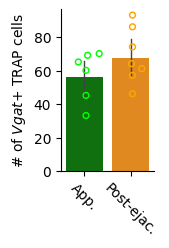

In [10]:
variable = 'Vgat_TRAP_cells'
figure_key = 'S9E'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.1))
sns.barplot(data = HCR_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Post_ejaculatory'],
errwidth = 1,palette = ['green','darkorange'],color= 'k')
sns.swarmplot(data = HCR_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Post_ejaculatory'],
facecolors='none',palette = ['lime','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('# of $\it{Vgat}$+ TRAP cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [11]:
# Statistical test for Figure S7B

from scipy.stats import ttest_ind

alpha = 0.05

# extract # of TRAP cells
# run ttest-ind on the # of TRAP cells between the Appetitive TRAP and Post_ejaculatory TRAP condition
group1 = 'Appetitive'
group2 = 'Post_ejaculatory'
ctl = HCR_summary.loc[HCR_summary.Stim == group1,variable].values
test = HCR_summary.loc[HCR_summary.Stim == group2,variable].values
ttest_stats = ttest_ind(ctl,test)
tstats,pval = ttest_stats
print(variable,pval,pval < alpha)
print(len(ctl),len(test))

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_ttest.pickle'), 'wb') as handle:
    pickle.dump(ttest_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

ttest = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Students t-test',
        'Detail': f'{group1} vs {group2}',
        'statistic description': f't({len(ctl) + len(test) -2})',  # Showing "n" for each group
        'statistic': tstats,
        'p Value': pval
    }])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest], ignore_index=True)

Vgat_TRAP_cells 0.21047443171312208 False
6 7


## Figure S9F

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\2664041005.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = HCR_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Post_ejaculatory'],


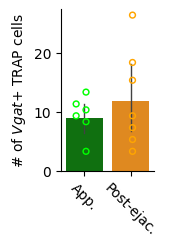

In [12]:
variable = 'Vglut2_TRAP_cells'
figure_key = 'S9F'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.1))
sns.barplot(data = HCR_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Post_ejaculatory'],
errwidth = 1,palette = ['green','darkorange'],color= 'k')
sns.swarmplot(data = HCR_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Post_ejaculatory'],
facecolors='none',palette = ['lime','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('# of $\it{Vgat}$+ TRAP cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [13]:
# Statistical test for Figure S7B

from scipy.stats import ttest_ind

alpha = 0.05

# extract # of TRAP cells
# run ttest-ind on the # of TRAP cells between the Appetitive TRAP and Post_ejaculatory TRAP condition
group1 = 'Appetitive'
group2 = 'Post_ejaculatory'
ctl = HCR_summary.loc[HCR_summary.Stim == group1,variable].values
test = HCR_summary.loc[HCR_summary.Stim == group2,variable].values
ttest_stats = ttest_ind(ctl,test)
tstats,pval = ttest_stats
print(variable,pval,pval < alpha)
print(len(ctl),len(test))

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_ttest.pickle'), 'wb') as handle:
    pickle.dump(ttest_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

ttest = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Students t-test',
        'Detail': f'{group1} vs {group2}',
        'statistic description': f't({len(ctl) + len(test) -2})',  # Showing "n" for each group
        'statistic': tstats,
        'p Value': pval
    }])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest], ignore_index=True)

Vglut2_TRAP_cells 0.44527542302599477 False
6 7


## Figure S9G

In [14]:
meta_columns = ['ID', 'Group', 'Stim']

tempdf = HCR_summary[meta_columns + ['Vgat_probability','Vglut2_probability']].set_index(meta_columns).stack().reset_index().rename(
    columns = {'level_3':'Variable',0:'Value'})

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\3524699022.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['$\it{Vgat}$','$\it{Vglut2}$'])


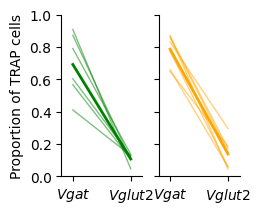

In [15]:
figure_key = 'S9G'

fig,axs = plt.subplots(1,2,figsize = (2.3,2.1),sharex = True,sharey = True)
sns.lineplot(data = tempdf[tempdf.Stim == 'Appetitive'],color = 'green',x = 'Variable',y = 'Value',ax = axs[0],
            err_style= None,lw = 2)
sns.lineplot(data = tempdf[tempdf.Stim == 'Appetitive'],color = 'green',x = 'Variable',y = 'Value',ax = axs[0],
            estimator = None,units = 'ID',alpha = 0.5,lw = 1)
sns.lineplot(data = tempdf[tempdf.Stim == 'Post_ejaculatory'],color = 'orange',x = 'Variable',y = 'Value',ax = axs[1],
            err_style= None,lw = 2)
sns.lineplot(data = tempdf[tempdf.Stim == 'Post_ejaculatory'],color = 'orange',x = 'Variable',y = 'Value',ax = axs[1],
            estimator = None,units = 'ID',alpha = 0.5,lw = 1)
axs[0].set_ylim(0,1)
axs[0].set_xlim(-0.2,1.2)
axs[0].set_xticklabels(['$\it{Vgat}$','$\it{Vglut2}$'])
[ax.set_xlabel('') for ax in axs]
axs[0].set_ylabel('Proportion of TRAP cells')
sns.despine()
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [16]:
# Statistical test for Figure S7B

from scipy.stats import ttest_rel

alpha = 0.05

# extract # of TRAP cells
# run ttest-ind on the # of TRAP cells between the Appetitive TRAP and Post_ejaculatory TRAP condition
variable = 'Proportion of TRAP cells'
group1 = 'Vgat'
group2 = 'Vglut2'
ctl = tempdf[(tempdf.Stim == 'Appetitive')&(tempdf.Variable == f'{group1}_probability')].Value.values
test = tempdf[(tempdf.Stim == 'Appetitive')&(tempdf.Variable == f'{group2}_probability')].Value.values
ttest_stats = ttest_rel(ctl,test)
tstats,pval = ttest_stats
print(variable,pval,pval < alpha)
print(len(ctl),len(test))

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_ttest.pickle'), 'wb') as handle:
    pickle.dump(ttest_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

ttest = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Students relative t-test',
        'Detail': f'Appetitive; {group1} vs {group2}',
        'statistic description': f't({len(ctl) + len(test) -2})',  # Showing "n" for each group
        'statistic': tstats,
        'p Value': pval * 2 
    }])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest], ignore_index=True)

Proportion of TRAP cells 0.0011875723052213 True
6 6


In [17]:
# Statistical test for Figure S7B

from scipy.stats import ttest_rel

alpha = 0.05

# extract # of TRAP cells
# run ttest-ind on the # of TRAP cells between the Appetitive TRAP and Post_ejaculatory TRAP condition
variable = 'Proportion of TRAP cells'
group1 = 'Vgat'
group2 = 'Vglut2'
ctl = tempdf[(tempdf.Stim == 'Post_ejaculatory')&(tempdf.Variable == f'{group1}_probability')].Value.values
test = tempdf[(tempdf.Stim == 'Post_ejaculatory')&(tempdf.Variable == f'{group2}_probability')].Value.values
ttest_stats = ttest_rel(ctl,test)
tstats,pval = ttest_stats
print(variable,pval,pval < alpha)
print(len(ctl),len(test))

# save results
import pickle
with open(os.path.join(statspath,f'Figure{figure_key}_ttest.pickle'), 'wb') as handle:
    pickle.dump(ttest_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

ttest = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':variable,
        'Type of Test': 'Students relative t-test',
        'Detail': f'Post_ejaculatory; {group1} vs {group2}',
        'statistic description': f't({len(ctl) + len(test) -2})',  # Showing "n" for each group
        'statistic': tstats,
        'p Value': pval * 2 
    }])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttest], ignore_index=True)

Proportion of TRAP cells 8.465535527467406e-06 True
7 7


# Figure S9I-L

In [18]:
# The summary of analysis for c-Fos antibody staining in the MPOA.
# The sections used with hM3Dq were used for analysis.

antibody_summary = pd.read_csv(os.path.join(datapath,'FigS9_antibody_data.csv'),index_col = False)

## Figure S9I

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\2027029338.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


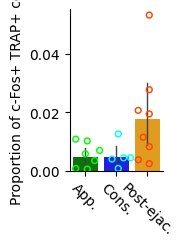

In [19]:
variable = 'proportion_dp_cells'
figure_key = 'S9I'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.1))
sns.barplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
errwidth = 1,palette = ['green','blue','orange'],color= 'k')
sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
facecolors='none',palette = ['lime','cyan','orangered'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Cons.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Proportion of c-Fos+ TRAP+ cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pickle
#perform two-way ANOVA
model = ols(f'{variable} ~ C(Stim)', data=antibody_summary).fit()
#sm.stats.anova_lm(model, typ=2)
table = sm.stats.anova_lm(model, typ=2)
print(table)
# Extract ANOVA results
anova_df1 = table['df'].values[0]  # Between-subject df
anova_df2 = table['df'].values[1]  # Error df
anova_F = table['F'].values[0]
anova_p = table['PR(>F)'].values[0]
# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':'Total number of TRAP cells',
    'Type of Test': 'One-way ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(antibody_summary[variable],antibody_summary['Stim'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure{figure_key}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':'Total number of TRAP cells',
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'meandiff',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

            sum_sq    df         F   PR(>F)
C(Stim)   0.000806   2.0  3.256915  0.06347
Residual  0.002104  17.0       NaN      NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
  Appetitive     Consummatory  -0.0003 0.9991  -0.017 0.0165  False
  Appetitive Post_ejaculatory   0.0128 0.0942 -0.0019 0.0276  False
Consummatory Post_ejaculatory   0.0131 0.1268 -0.0032 0.0294  False
-------------------------------------------------------------------


## Figure S9J

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\2506109169.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],


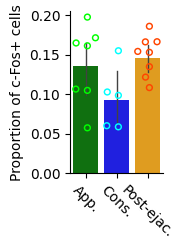

In [21]:
variable = 'proportion_cFos_cells'
figure_key = 'S9J'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.1))
sns.barplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
errwidth = 1,palette = ['green','blue','orange'],color= 'k')
sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
facecolors='none',palette = ['lime','cyan','orangered'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Cons.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Proportion of c-Fos+ cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pickle
#perform two-way ANOVA
model = ols(f'{variable} ~ C(Stim)', data=antibody_summary).fit()
#sm.stats.anova_lm(model, typ=2)
table = sm.stats.anova_lm(model, typ=2)
print(table)
# Extract ANOVA results
anova_df1 = table['df'].values[0]  # Between-subject df
anova_df2 = table['df'].values[1]  # Error df
anova_F = table['F'].values[0]
anova_p = table['PR(>F)'].values[0]
# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':'Total number of TRAP cells',
    'Type of Test': 'One-way ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(antibody_summary[variable],antibody_summary['Stim'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure{figure_key}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':'Total number of TRAP cells',
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'meandiff',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

            sum_sq    df         F    PR(>F)
C(Stim)   0.009327   2.0  3.128523  0.069679
Residual  0.025342  17.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
  Appetitive     Consummatory  -0.0427 0.1724 -0.1007 0.0153  False
  Appetitive Post_ejaculatory   0.0111 0.8445 -0.0401 0.0624  False
Consummatory Post_ejaculatory   0.0538 0.0631 -0.0027 0.1103  False
-------------------------------------------------------------------


## Figure S9K

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\3405672734.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


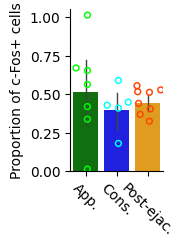

In [23]:
variable = 'Accuracy'
figure_key = 'S9K'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.1))
sns.barplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
errwidth = 1,palette = ['green','blue','orange'],color= 'k')
sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
facecolors='none',palette = ['lime','cyan','orangered'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Cons.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Proportion of c-Fos+ cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pickle
#perform two-way ANOVA
model = ols(f'{variable} ~ C(Stim)', data=antibody_summary).fit()
#sm.stats.anova_lm(model, typ=2)
table = sm.stats.anova_lm(model, typ=2)
print(table)
# Extract ANOVA results
anova_df1 = table['df'].values[0]  # Between-subject df
anova_df2 = table['df'].values[1]  # Error df
anova_F = table['F'].values[0]
anova_p = table['PR(>F)'].values[0]
# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':'Total number of TRAP cells',
    'Type of Test': 'One-way ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(antibody_summary[variable],antibody_summary['Stim'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure{figure_key}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':'Total number of TRAP cells',
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'meandiff',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

            sum_sq    df         F    PR(>F)
C(Stim)   0.039638   2.0  0.466618  0.634917
Residual  0.722050  17.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
  Appetitive     Consummatory  -0.1134 0.6234  -0.423 0.1962  False
  Appetitive Post_ejaculatory  -0.0683 0.8001 -0.3419 0.2053  False
Consummatory Post_ejaculatory   0.0451 0.9224 -0.2563 0.3465  False
-------------------------------------------------------------------


## Figure S9L

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_16704\4079880096.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


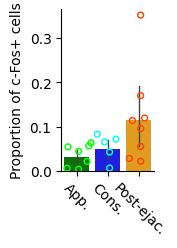

In [25]:
variable = 'Efficiency'
figure_key = 'S9L'

fig,axs = plt.subplots(1,1,figsize = (1.2,2.1))
sns.barplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
errwidth = 1,palette = ['green','blue','orange'],color= 'k')
sns.swarmplot(data = antibody_summary,x = 'Stim',y = variable,ax = axs,order = ['Appetitive','Consummatory','Post_ejaculatory'],
facecolors='none',palette = ['lime','cyan','orangered'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xticklabels(['App.','Cons.','Post-ejac.'],rotation = -45)
axs.set_xlabel('')
axs.set_ylabel('Proportion of c-Fos+ cells')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'Figure{figure_key}.pdf'),bbox_inches ='tight')

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pickle
#perform two-way ANOVA
model = ols(f'{variable} ~ C(Stim)', data=antibody_summary).fit()
#sm.stats.anova_lm(model, typ=2)
table = sm.stats.anova_lm(model, typ=2)
print(table)
# Extract ANOVA results
anova_df1 = table['df'].values[0]  # Between-subject df
anova_df2 = table['df'].values[1]  # Error df
anova_F = table['F'].values[0]
anova_p = table['PR(>F)'].values[0]
# Append ANOVA result to DataFrame (using pd.concat instead of append)
anova_data = pd.DataFrame([{
    'Figure': f'Figure{figure_key}',
    'variable':'Total number of TRAP cells',
    'Type of Test': 'One-way ANOVA',
    'Detail': 'across states',
    'statistic description': f'F({anova_df1},{anova_df2})',
    'statistic': anova_F,
    'p Value': anova_p
}])

# Concatenate the new data with the existing results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, anova_data], ignore_index=True)
# Run Tukey's HSD test
tukey_results = pairwise_tukeyhsd(antibody_summary[variable],antibody_summary['Stim'])
tukey_summary = tukey_results.summary()
print(tukey_summary)
# Save the Tukey results to a file
with open(os.path.join(statspath, f'Figure{figure_key}_TukeyHSD.pickle'), 'wb') as handle:
    pickle.dump(tukey_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Append Tukey HSD results to DataFrame
for comparison in tukey_summary.data[1:]:
    group1, group2, meandiff, p_adj, lower, upper, reject = comparison

    # Append posthoc result to DataFrame (using pd.concat instead of append)
    ttukeyHSD_df = pd.DataFrame([{
        'Figure': f'Figure{figure_key}',
        'variable':'Total number of TRAP cells',
        'Type of Test': 'Tukey HSD',
        'Detail': f'{group1} vs {group2}',
        'statistic description': 'meandiff',
        'statistic': meandiff,
        'p Value': p_adj
    }])

    # Concatenate the new data with the existing results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, ttukeyHSD_df], ignore_index=True)

            sum_sq    df         F    PR(>F)
C(Stim)   0.028754   2.0  2.831305  0.086832
Residual  0.086323  17.0       NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
  Appetitive     Consummatory    0.018 0.9028  -0.089 0.1251  False
  Appetitive Post_ejaculatory   0.0836 0.0882  -0.011 0.1782  False
Consummatory Post_ejaculatory   0.0656 0.2666 -0.0386 0.1698  False
-------------------------------------------------------------------


In [27]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)